# Solución de ejercicios liceo Volta 2020-21
Durante el año lectivo 2020-21 los estudiantes del Liceo del Gimnasio Alesandro Volta han respondido una encuesta al finalizar la solución de ejercicios propuestos por el profesor.

La encuesta es de google forms, y los resultados están guardados en una hoja de google sheets. Para su análisis se harán los siguientes pasos:
1. Obtener datos de la hoja de cálculo
2. Analizar por curso y por taller
3. Analizar por estudiante
4. ....

### Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *

## Autenticarse con google y obtener datos

In [2]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SPREADSHEET_ID = "1mpuSZwgZO_CAVO1g90UDQAri_rip98Hrs939t3Jpd5Q"
students_spreadsheet_id = "1rWju7T0eNFGi-FoIRgrF87-IsQu40AP087tzzKq8fyg"
RANGE_NAME = "Respuestas de formulario 1"
range_name2 = "Hoja 1"

In [3]:
data = pull_sheet_data(SCOPES, SPREADSHEET_ID, RANGE_NAME)
data2 = pull_sheet_data(SCOPES, students_spreadsheet_id, range_name2)

COMPLETE: Data copied
COMPLETE: Data copied


In [4]:
surveyDf = pd.DataFrame(data[1:], columns=data[0])
studentsDf = pd.DataFrame(data2[1:], columns = data2[0])

In [5]:
surveyDf.head()

,Marca temporal,Dirección de correo electrónico,Código taller,Cómo te fue: [Ejercicio 1],Cómo te fue: [Ejercicio 2],Cómo te fue: [Ejercicio 3],Cómo te fue: [Ejercicio 4],Cómo te fue: [Ejercicio 5]
0,3/9/2020 7:54:15,mattiapietro.canale@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Excelente,Excelente,Excelente
1,3/9/2020 8:04:52,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021001,Excelente,Bien,Excelente,Excelente,Bien
2,3/9/2020 8:05:03,davidalejandro.plazasr@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Excelente
3,3/9/2020 8:05:54,martin.polaniag@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Bien,Bien,Bien
4,3/9/2020 8:05:59,lauragabriela.gonzalezj@gimnasiovolta.edu.co,2202021001,Bien,Bien,Regular,Regular,Bien


In [6]:
studentsDf.head()

,Nombre,Curso,Correo
0,"Arámbula Jaimes, Nicolás Andrés",1,nicolasandres.arambulaj@gimnasiovolta.edu.co
1,"Castro Céspedes, Jorge Andrés",1,jorgeandres.castroc@gimnasiovolta.edu.co
2,"Castro Medina, Francisco",1,francisco.castrom@gimnasiovolta.edu.co
3,"Clavijo Rey, Mariana",1,mariana.clavijor@gimnasiovolta.edu.co
4,"Cotes Ontibón, Aníbal Santiago",1,anibalsantiago.coteso@gimnasiovolta.edu.co


## Limpiar los datos

### Asignar nombres y tipos de columnas adecuados

In [7]:
surveyDf.columns = ['dateTime', 'email', 'psCode',
       'problem1', 'problem2',
       'problem3', 'problem4',
       'problem5']

In [8]:
surveyDf.dtypes

dateTime    object
email       object
psCode      object
problem1    object
problem2    object
problem3    object
problem4    object
problem5    object
dtype: object

In [9]:
surveyDf['dateTime'] = surveyDf['dateTime'].astype('datetime64')

In [10]:
studentsDf.columns = ["nombre", "curso", "email"]

### Unir la base de datos de estudiantes con la encuesta

In [11]:
df = pd.merge(surveyDf, studentsDf, on="email")

In [12]:
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso
0,2020-03-09 07:54:15,mattiapietro.canale@gimnasiovolta.edu.co,2202021001,Excelente,Excelente,Excelente,Excelente,Excelente,"Canale , Mattia Pietro",2
1,2020-06-09 11:19:24,mattiapietro.canale@gimnasiovolta.edu.co,2202021002,Excelente,Excelente,Excelente,Excelente,Excelente,"Canale , Mattia Pietro",2
2,2020-03-09 08:04:52,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021001,Excelente,Bien,Excelente,Excelente,Bien,"Manrique Botero, Maria Alexandra",2
3,2020-07-09 06:52:39,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021002,Bien,Bien,Regular,Bien,Bien,"Manrique Botero, Maria Alexandra",2
4,2020-09-16 07:16:02,mariaalexandra.manriqueb@gimnasiovolta.edu.co,2202021004,Bien,Bien,Bien,Regular,Bien,"Manrique Botero, Maria Alexandra",2


## Tomar solo la respuesta mas reciente de cada estudiante en cada taller

In [13]:
df = df.loc[df.groupby(["curso",'nombre','psCode']).dateTime.idxmax()]

In [14]:
df.to_csv('cleanData.csv')

In [15]:
for psCode in df['psCode'].unique():
    
    print(psCode)

1202021001
1202021002
1202021004
2202021001
2202021002
2202021004
2202021005
3202021001
3202021002
3202021003
3202021004
4202021001
4202021002


In [16]:
problemas = ["problem1", "problem2", "problem3", "problem4", "problem5"]
for problema in problemas:
    df[problema].replace(["Excelente","Bien", "Regular", "No lo hice", "Mal"], [0,1,2,3,4], inplace = True)
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso
46,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1
48,2020-10-09 11:46:16,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021002,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1
50,2020-12-09 17:08:45,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021004,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1
211,2020-10-09 09:15:01,jorgeandres.castroc@gimnasiovolta.edu.co,1202021001,2,1,3,1,4,"Castro Céspedes, Jorge Andrés",1
212,2020-10-09 11:23:34,jorgeandres.castroc@gimnasiovolta.edu.co,1202021002,0,1,0,1,0,"Castro Céspedes, Jorge Andrés",1


## Calcular puntaje de dificultad que cada estudiante le asignó a cada taller

In [17]:
df['dificultad'] =df[problemas].sum(axis=1)

In [18]:
df.head()

,dateTime,email,psCode,problem1,problem2,problem3,problem4,problem5,nombre,curso,dificultad
46,2020-03-09 12:08:36,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021001,2,0,1,0,1,"Arámbula Jaimes, Nicolás Andrés",1,4
48,2020-10-09 11:46:16,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021002,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1,2
50,2020-12-09 17:08:45,nicolasandres.arambulaj@gimnasiovolta.edu.co,1202021004,0,0,1,1,0,"Arámbula Jaimes, Nicolás Andrés",1,2
211,2020-10-09 09:15:01,jorgeandres.castroc@gimnasiovolta.edu.co,1202021001,2,1,3,1,4,"Castro Céspedes, Jorge Andrés",1,11
212,2020-10-09 11:23:34,jorgeandres.castroc@gimnasiovolta.edu.co,1202021002,0,1,0,1,0,"Castro Céspedes, Jorge Andrés",1,2


## Estudiantes con mayor dificultad

In [19]:
df[["nombre", "dificultad"]].groupby(["nombre"]).sum().sort_values("dificultad", ascending=False)

,dificultad
nombre,
"Rojas Gómez, Laura Natalia",46
"Moreno Delgado, María José",41
"Vega Vergara, Julian Esteban",34
"Moreno Cañizares, Luis Alejandro",32
"Vargas Mafioly, Isabella",30
...,...
"Hernández Pardo, Julián Andrés",2
"Gutierrez Giraldo, Sergio Esteban",2
"Pacheco Tocora, Juanita",1


## Dificultad promedio por taller

In [20]:
df[["psCode", "dificultad"]].groupby(["psCode"]).sum().sort_values("dificultad", ascending=False)

,dificultad
psCode,
3202021001,134
2202021001,114
1202021001,111
2202021004,94
1202021004,87
3202021003,77
2202021002,75
2202021005,68
3202021002,67


<AxesSubplot:>

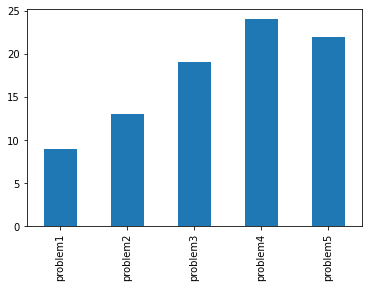

In [38]:
df.loc[df["psCode"]=="1202021004"][["problem1", "problem2", "problem3", "problem4", "problem5"]].sum(axis=0).plot(kind="bar")

## Número de talleres presentados por estudiante vs máximo clase

In [22]:
studentsDf['nombre']

0     Arámbula Jaimes, Nicolás Andrés
1       Castro Céspedes, Jorge Andrés
2            Castro Medina, Francisco
3                Clavijo Rey, Mariana
4      Cotes Ontibón, Aníbal Santiago
                   ...               
69               Mineo Pachón, Matteo
70            Ortolan Conto, Emanuela
71               Sánchez Páez, Felipe
72           Suárez Dolmen, Alejandro
73         Torres Prada, Sarah Elvira
Name: nombre, Length: 74, dtype: object

In [23]:
participation = df[["curso", "nombre", "psCode"]].groupby(["nombre","curso"]).count()
participation =participation.rename(columns={"psCode":"talleres"})

participation = participation.reset_index()

In [24]:
participation.index

RangeIndex(start=0, stop=70, step=1)

In [25]:
newStudents = []
for estudiante in studentsDf['nombre']:
    if estudiante not in list(df['nombre']):
        newStudent = {"nombre":estudiante, "curso":studentsDf.loc[studentsDf['nombre']==estudiante]['curso'].iloc[0], "talleres":0}
        newStudents.append(newStudent)
newDf = pd.DataFrame(newStudents)
participation = participation.append(newDf)

In [26]:
participation = participation.sort_values(by=["curso", "nombre"])

In [27]:
numTalleres = participation[["curso", "talleres"]].groupby('curso').max()
numTalleres

,talleres
curso,
1,3
2,4
3,4
4,2


In [28]:
maxTalleres = []
for index in participation.index:    
    curso = participation.iloc[index]['curso']
    maxTalleres.append(numTalleres.loc[curso, "talleres"])
participation['maxTalleres']    = maxTalleres

In [42]:
participation[participation["curso"]=="1"]

,nombre,curso,talleres,maxTalleres,nota
2,"Arámbula Jaimes, Nicolás Andrés",1,3,3,10.0
11,"Castro Céspedes, Jorge Andrés",1,3,3,10.0
12,"Castro Medina, Francisco",1,2,3,7.3
13,"Clavijo Rey, Mariana",1,3,3,10.0
16,"Cotes Ontibón, Aníbal Santiago",1,3,3,10.0
0,"González Linares, Sofía",1,0,3,2.0
31,"Jaramillo Ruiz , Gabriela",1,3,4,8.0
40,"Moreno Mondragon, José Alejandro",1,2,4,6.0
41,"Mosquera Vergara, Juan Daniel",1,3,4,8.0
44,"Noriega López, Tomás Felipe",1,2,4,6.0


In [30]:
participation['nota'] = round(2 + 8 * participation['talleres']/participation['maxTalleres'],1)

In [31]:
participation

,nombre,curso,talleres,maxTalleres,nota
2,"Arámbula Jaimes, Nicolás Andrés",1,3,3,10.0
11,"Castro Céspedes, Jorge Andrés",1,3,3,10.0
12,"Castro Medina, Francisco",1,2,3,7.3
13,"Clavijo Rey, Mariana",1,3,3,10.0
16,"Cotes Ontibón, Aníbal Santiago",1,3,3,10.0
...,...,...,...,...,...
36,"Mineo Pachón, Matteo",4,2,4,6.0
3,"Ortolan Conto, Emanuela",4,0,3,2.0
61,"Suárez Dolmen, Alejandro",4,2,2,10.0
62,"Sánchez Páez, Felipe",4,2,2,10.0


<AxesSubplot:xlabel='psCode'>

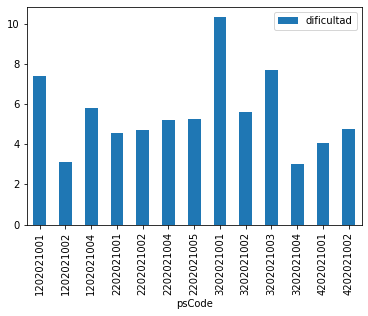

In [32]:
df[["psCode", "dificultad"]].groupby(['psCode']).mean().plot(kind="bar")

## Graficar diagramas de barras para cada taller

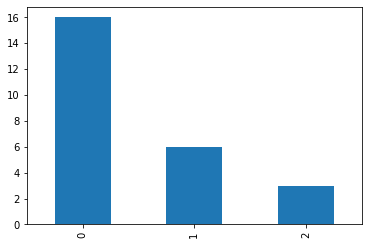

In [33]:
df[df['psCode']=="2202021001"]["problem1"].value_counts().plot(kind="bar");

In [34]:
df.groupby(["psCode", "problem1","problem2", "problem3", "problem4", "problem5" ]).count()

dateTime  email  \
psCode     problem1 problem2 problem3 problem4 problem5                    
1202021001 1        1        1        2        4                1      1   
           2        0        1        0        0                1      1   
                                               1                1      1   
                             2        0        1                1      1   
                             4        0        0                1      1   
...                                                           ...    ...   
4202021002 0        0        1        2        4                1      1   
                                      4        1                2      2   
                             2        2        4                1      1   
                    1        0        1        1                1      1   
           1        1        2        1        1                1      1   

                                                         nombre  curso  \
psCode     problem1 problem2 problem3 problem4 problem5                  
1202021001 1        1        1        2        4              1      1   
           2        0        1        0        0              1      1   
                                               1              1      1   
                             2        0        1              1      1   
                             4        0        0              1      1   
...                                                         ...    ...   
4202021002 0        0        1        2        4              1      1   
                                      4        1              2      2   
                             2        2        4              1      1   
                    1        0        1        1              1      1   
           1        1        2        1        1              1      1   

                                                         dificultad  
psCode     problem1 problem2 problem3 problem4 problem5              
1202021001 1        1        1        2        4                  1  
           2        0        1        0        0                  1  
                                               1                  1  
                             2        0        1                  1  
                             4        0        0                  1  
...                                                             ...  
4202021002 0        0        1        2        4                  1  
                                      4        1                  2  
                             2        2        4                  1  
                    1        0        1        1                  1  
           1        1        2        1        1                  1  

[162 rows x 5 columns]